LinregressResult(slope=0.06304458401213481, intercept=-119.0659419677398, rvalue=0.9847571311825852, pvalue=3.788696979109601e-102, stderr=0.0009692118713287097, intercept_stderr=1.886943381242512)


<AxesSubplot:title={'center':'Rise in Sea Level'}, xlabel='Year', ylabel='Sea Level (inches)'>

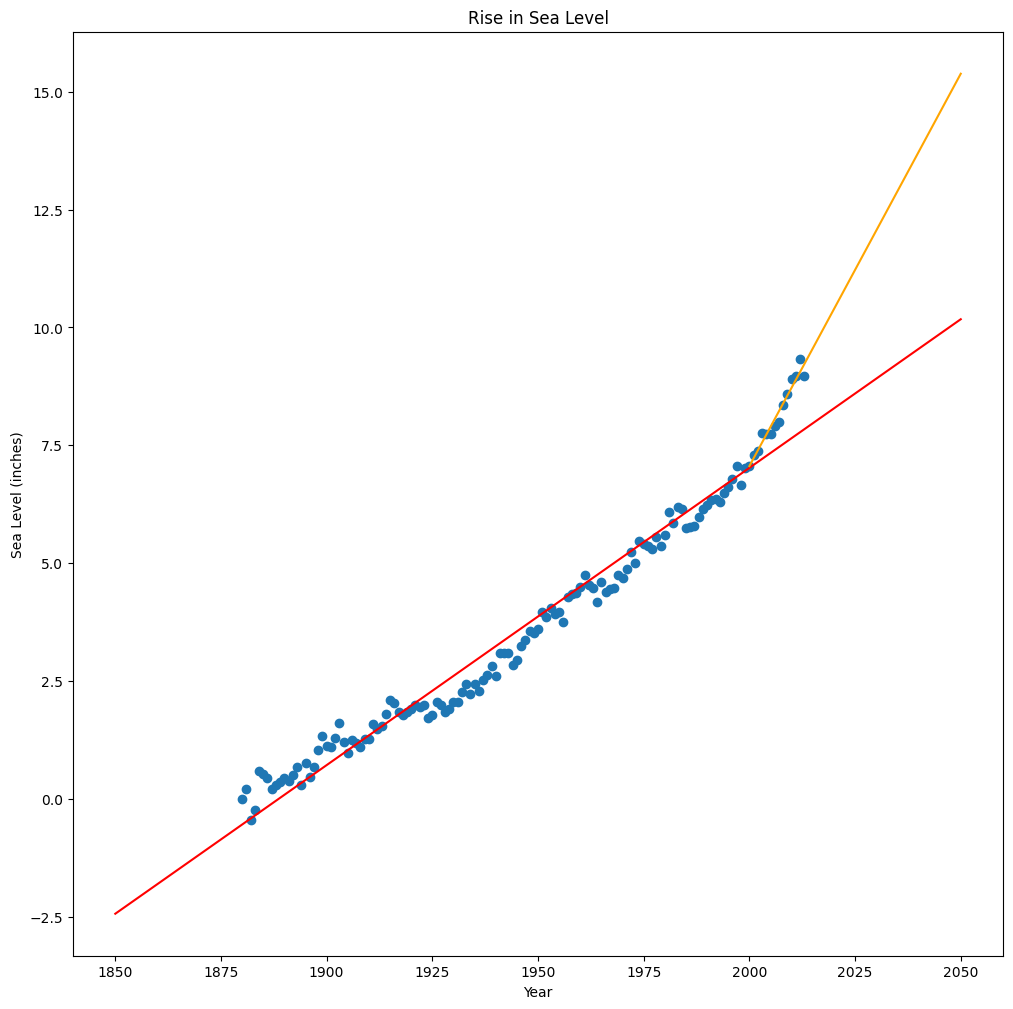

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

def draw_plot():
    # Read data from file
    df = pd.read_csv("epa-sea-level.csv")

    # Create scatter plot
    x = df["Year"]
    y = df["CSIRO Adjusted Sea Level"]

    fig, ax = plt.subplots(figsize=(12,12))
    ax = plt.scatter(x, y)

    res = linregress(x,y)
    print(res)
    x_forcast= pd.Series(([i for i in range(1850, 2051)]))
    y_forcast = res.slope*x_forcast + res.intercept
    plt.plot(x_forcast, y_forcast, 'r-')

    df_forc = df.loc[df["Year"] >= 2000]
    new_x = df_forc["Year"]
    new_y = df_forc["CSIRO Adjusted Sea Level"]

    new_res = linregress(new_x, new_y)
    new_x_forcast= pd.Series(([i for i in range(2000, 2051)]))
    new_y_forcast = new_res.slope*new_x_forcast + new_res.intercept
    plt.plot(new_x_forcast, new_y_forcast, 'orange')

    plt.title("Rise in Sea Level")
    plt.xlabel("Year")
    plt.ylabel("Sea Level (inches)")

    plt.savefig('sea_level_plot.png')
    return plt.gca()
    
draw_plot()